# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
android_persistence=pd.read_csv('../data/android_persistence_cpu.csv', sep=None)


# # In het geval dat wij veel hebben, dan maken wij gebruik van een forloop
# categorical_columns = ['kolom_naam1', 'kolom_naam2']  # Pas aan op basis van jouw dataset
# for col in categorical_columns:
#     android_persistence[col] = android_persistence[col].astype('category')

android_persistence['PersistenceType'] = android_persistence['PersistenceType'].astype('category')
android_persistence['DataSize'] = android_persistence['DataSize'].astype('category')

ordinal_categories = ['Small','Medium','Large']
android_persistence['DataSize'] = android_persistence['DataSize'].astype(CategoricalDtype(categories=ordinal_categories, ordered=True))

C:\Users\sweme\AppData\Local\Temp\ipykernel_14932\3633909706.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  android_persistence=pd.read_csv('../data/android_persistence_cpu.csv', sep=None)


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

C:\Users\sweme\AppData\Local\Temp\ipykernel_14932\2473895574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DataSize', data=android_persistence, order=['Small', 'Medium', 'Large'], palette="muted")


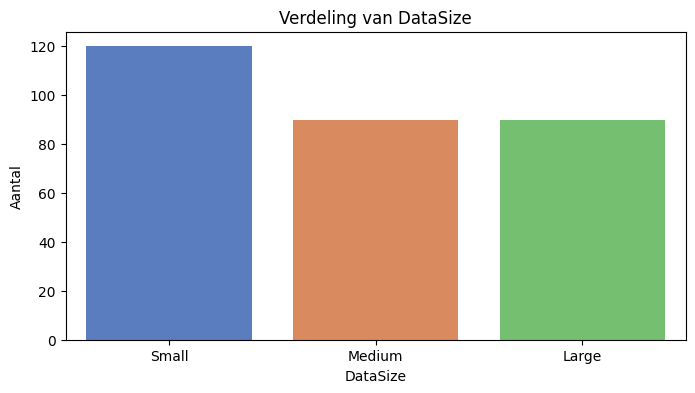

In [ ]:
# Visualisatie van DataSize
plt.figure(figsize=(8,4))
sns.countplot(x='DataSize', data=android_persistence, order=['Small', 'Medium', 'Large'], palette="muted") # palette is om verschillende kleuren te geven
plt.title("Verdeling van DataSize")
plt.xlabel("DataSize")
plt.ylabel("Aantal")
plt.show()


C:\Users\sweme\AppData\Local\Temp\ipykernel_11300\1890017796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PersistenceType', data=android_persistence, palette="muted")


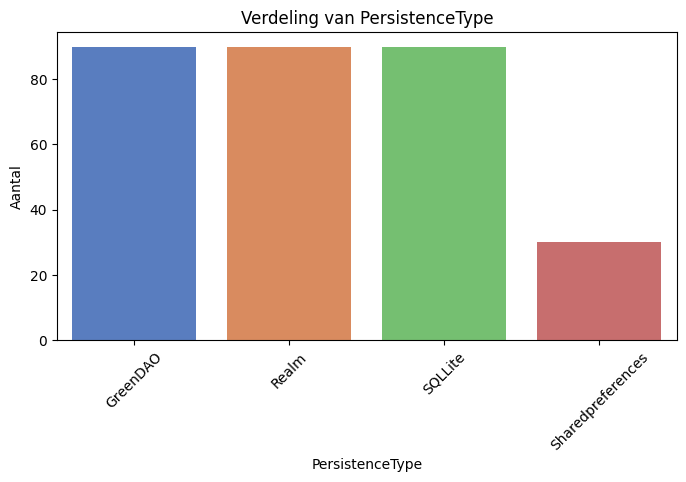

In [15]:
# Visualisatie van PersistenceType
plt.figure(figsize=(8,4))
sns.countplot(x='PersistenceType', data=android_persistence, palette="muted")
plt.title("Verdeling van PersistenceType")
plt.xlabel("PersistenceType")
plt.ylabel("Aantal")
plt.xticks(rotation=45)  # Rotatie als er veel categorieën zijn
plt.show()

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

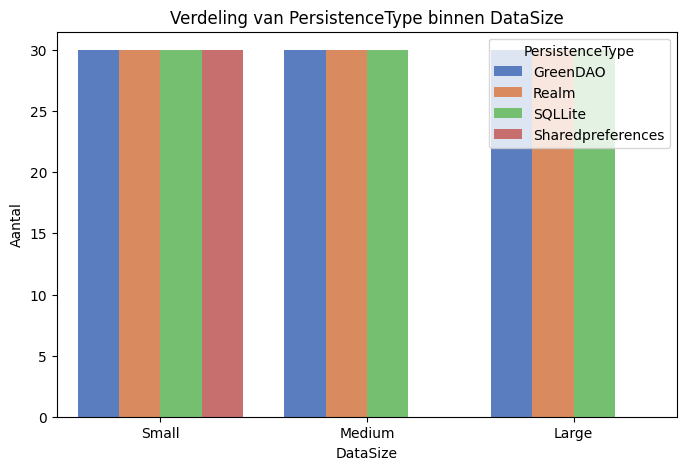

In [5]:
# Bedie samen in 1 grafiek
plt.figure(figsize=(8,5))
sns.countplot(x="DataSize", hue="PersistenceType", data=android_persistence, order=['Small', 'Medium', 'Large'], palette="muted")
plt.title("Verdeling van PersistenceType binnen DataSize")
plt.xlabel("DataSize")
plt.ylabel("Aantal")
plt.legend(title="PersistenceType")
plt.show()

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

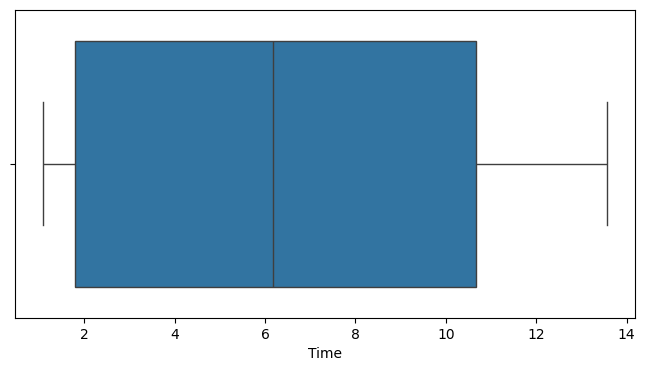

In [17]:
Time = android_persistence['Time']
plt.figure(figsize=(8, 4))
sns.boxplot(x=Time)
plt.xlabel('Time')
plt.show()

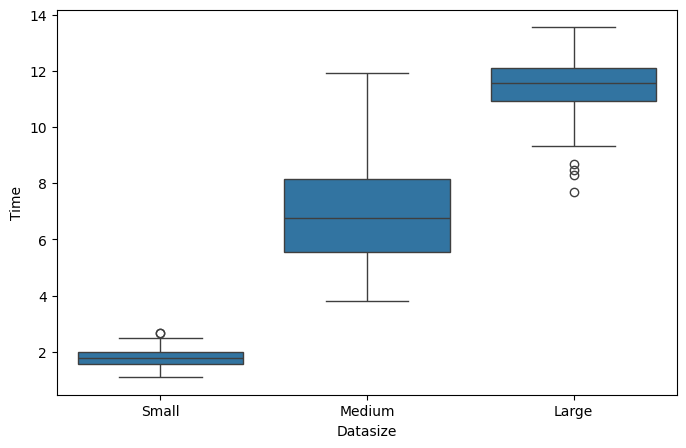

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DataSize', y='Time',data=android_persistence, order=['Small','Medium','Large'])
plt.xlabel('Datasize')
plt.ylabel('Time')
plt.show()


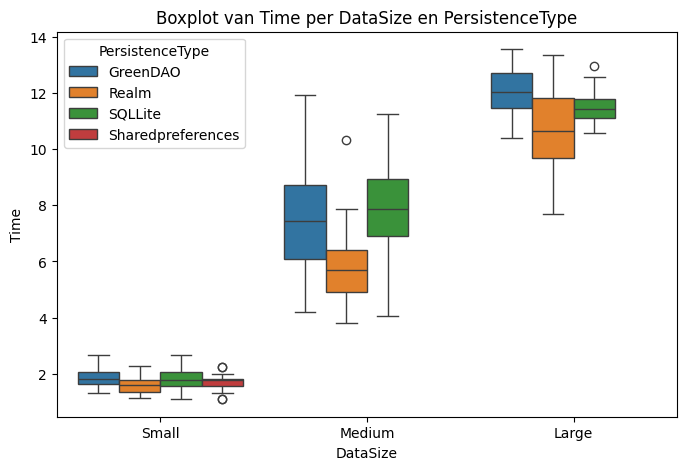

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DataSize',y='Time', hue='PersistenceType',data=android_persistence, order=['Small','Medium','Large'])
plt.xlabel('DataSize')
plt.ylabel('Time')
plt.title('Boxplot van Time per DataSize en PersistenceType')
plt.legend(title="PersistenceType")
plt.show()


**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

c:\Users\sweme\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


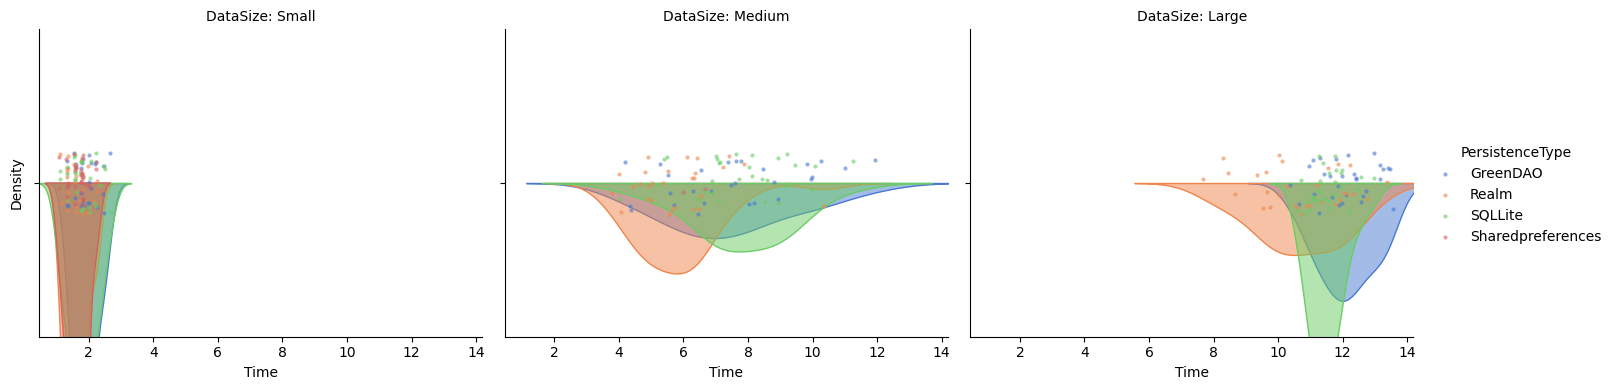

In [26]:
# FacetGrid: aparte plot per DataSize
g = sns.FacetGrid(android_persistence, 
                  col="DataSize", # Splits op DataSize (dus 3 grafieken)
                    hue="PersistenceType", # Kleur per opslagtype
                      height=4,
                        aspect=1.2, palette="muted")

# Density plot (kde) + scatterplot, Maakt de density curves (die gekleurde heuvels)
g.map(sns.kdeplot,  
      "Time", 
      fill=True, # vult het gebied onder de curve
        alpha=0.5)  # maakt het half transparant (zodat curves elkaar kunnen overlappen)

g.map(sns.stripplot, # toont individuele Time-waarden als stipjes
       "Time",
         alpha=0.6, 
         jitter=True,  # jitter=True = zorgt dat de puntjes niet precies op elkaar vallen
         size=3)  #  bepaalt hoe groot de stipjes zijn

# Extra opmaak
g.add_legend(title="PersistenceType")
g.set_axis_labels("Time", "Density")
g.set_titles(col_template="DataSize: {col_name}")
plt.show()


Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [26]:
mean_time=android_persistence['Time'].mean()
std_dev=android_persistence['Time'].std()

print(f"Mean Time (overall): {mean_time:.2f}")
print(f"Standard Deviation Time (overall): {std_dev:.2f}")

Mean Time (overall): 6.23
Standard Deviation Time (overall): 4.23


In [28]:
stats_by_size=android_persistence.groupby('DataSize')['Time'].agg(['mean','std']) # .agg(['mean','std']) :  Je vraagt voor elke groep de gemiddelde tijd (mean) én de standaarddeviatie (std)
print(stats_by_size)

               mean       std
DataSize                     
Small      1.741333  0.358625
Medium     7.022000  1.864335
Large     11.425667  1.163785


C:\Users\sweme\AppData\Local\Temp\ipykernel_14932\2665662676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_size=android_persistence.groupby('DataSize')['Time'].agg(['mean','std']) # .agg(['mean','std']) :  Je vraagt voor elke groep de gemiddelde tijd (mean) én de standaarddeviatie (std)


In [31]:
stats_by_persistence = android_persistence.groupby('PersistenceType')["Time"].agg(['std', 'mean'])
print(stats_by_persistence)


                        std      mean
PersistenceType                      
GreenDAO           4.385917  7.152667
Realm              3.884175  6.022889
SQLLite            4.146336  7.036000
Sharedpreferences  0.285192  1.673667


C:\Users\sweme\AppData\Local\Temp\ipykernel_14932\3476852677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_persistence = android_persistence.groupby('PersistenceType')["Time"].agg(['std', 'mean'])


In [ ]:
stats_by_both = android_persistence.groupby(['DataSize', 'PersistenceType'])['Time'].agg(['mean', 'std'])
print(stats_by_both)


                                 mean       std
PersistenceType   DataSize                     
GreenDAO          Large     12.110333  0.868461
                  Medium     7.454000  2.007358
                  Small      1.893667  0.347905
Realm             Large     10.651667  1.405990
                  Medium     5.818000  1.330951
                  Small      1.599000  0.314986
SQLLite           Large     11.515000  0.559142
                  Medium     7.794000  1.599007
                  Small      1.799000  0.415960
Sharedpreferences Large           NaN       NaN
                  Medium          NaN       NaN
                  Small      1.673667  0.285192


C:\Users\sweme\AppData\Local\Temp\ipykernel_11300\3310615013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_both = android_persistence.groupby(['PersistenceType', 'DataSize'])['Time'].agg(['mean', 'std'])


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
